# Global Mean Surface Temperature from Control Runs
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [14]:
!date
%matplotlib notebook

Mon Feb  5 10:45:22 EST 2018


### Data

In [15]:
data_name = 't_surf'
nclist = [
    {'tag': 'Control_1860', 
    'ncfile': '/tigress/wenchang/MODEL_OUT/PIctl_CMIP6volc/POSTP/0???0101.atmos_month.nc'
    },
    {'tag': 'Control_1860_CMIP6Volc', 
    'ncfile': '/tigress/wenchang/MODEL_OUT/Control_1860_CMIP6Volc/POSTP/0???0101.atmos_month.nc'
    },
    {'tag': 'Control_1990',
    'ncfile': '/tigress/gvecchi/MODEL_OUT/Control-1990_tigerx86_64.intel16_512PE/POSTP/0???0101.atmos_month.nc'
    },
    {'tag': 'Control_2000',
    'ncfile': '/tigress/wenchang/MODEL_OUT/Control_2000/POSTP/0???0101.atmos_month.nc'
    },
]

In [16]:
dss = dict()# key is tag, value is xr.Dataset
for nc in nclist:
    tag = nc['tag']
    ncfile = nc['ncfile']
    ds = xr.open_mfdataset(ncfile).rename({'grid_xt': 'lon', 'grid_yt':'lat'})
    ds['time'] = [datetime.datetime(*t.replace(year=t.year+2000).timetuple()[0:6]) for t in ds['time'].values]
    dss[tag] = ds

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [17]:
tss = dict() # key is tag, value is xr.DataArray
for tag,ds in dss.items():
    ts = ds[data_name].geo.fldmean().load()
    tss[tag] = ts

### Plot

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<IPython.core.display.Javascript object>


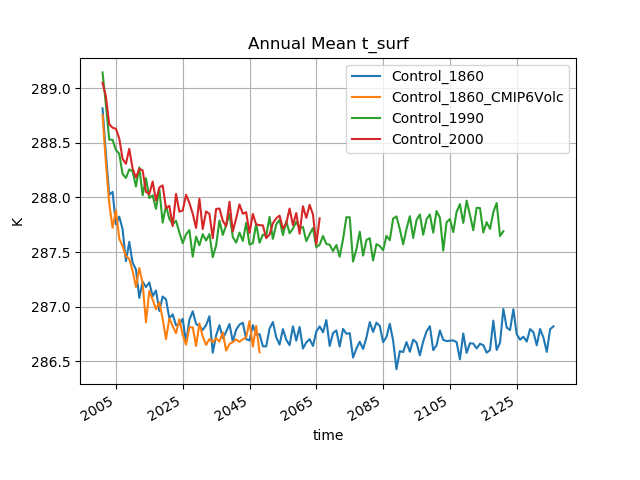

Text(0,0.5,'K')

In [18]:
for nc in nclist:
    tag = nc['tag']
    ts = tss[tag]
    ts.resample(time='AS').mean('time').plot(label=tag)
plt.legend(frameon=True)
plt.grid(True)
plt.title('Annual Mean t_surf')
plt.ylabel('K')